# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [2]:
#Import data set
hotel = pd.read_csv('INNHotelsGroup.csv')

In [3]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [5]:
data.tail()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [6]:
data.shape

(36275, 19)

Dataset has 19 columns and 36275 rows (Reservations). 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
# checking for null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

Dataset has not null vaules or dupilicated values, so we can move onto the EDA. 

In [10]:
#Drop the Booking ID column
data = data.drop(["Booking_ID"], axis=1)

In [11]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [12]:
data.describe().T #Gives statistical summary of dataset.

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

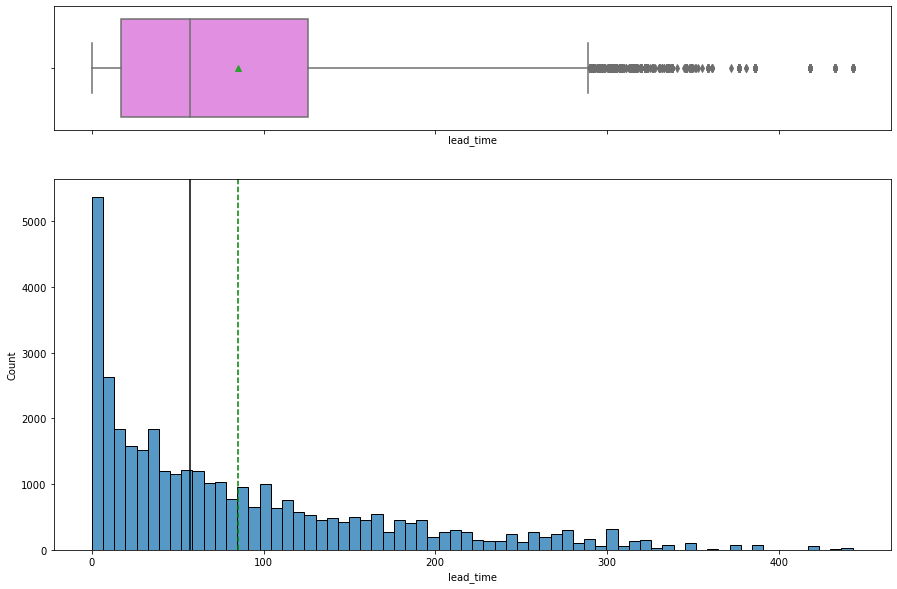

In [15]:
#Observations on lead time. 
histogram_boxplot(data, "lead_time") 

Lead time median is less than 50 days with more than 10% of the reservations being done the same day. The average falls under 80 days, but there is a spread of lead time for people planning vacations more than a few months out. 

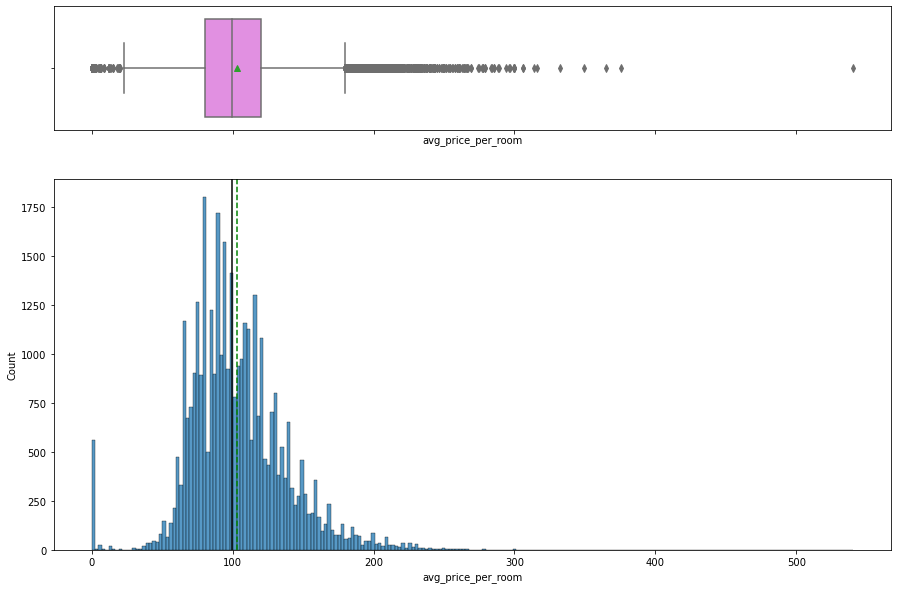

In [16]:
#Observations of Average room price
histogram_boxplot(data,"avg_price_per_room") 

Median and mean price are close and hover around the $100 dollar mark. 

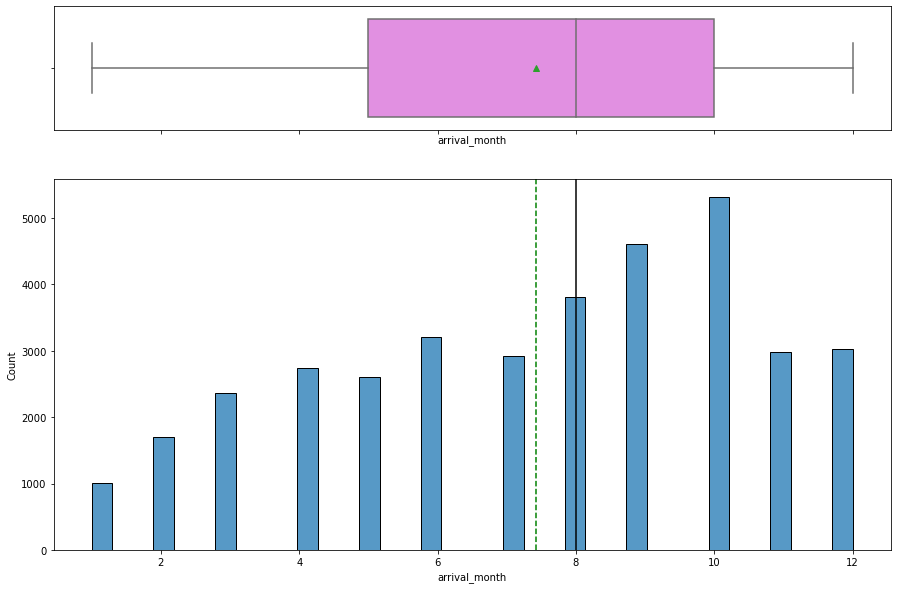

In [17]:
 #Observations of Arrival Month
histogram_boxplot(data,"arrival_month")

#### 1) What are the busiest months in the hotel?

According to the count plot the busiest months are Spetember and October. 

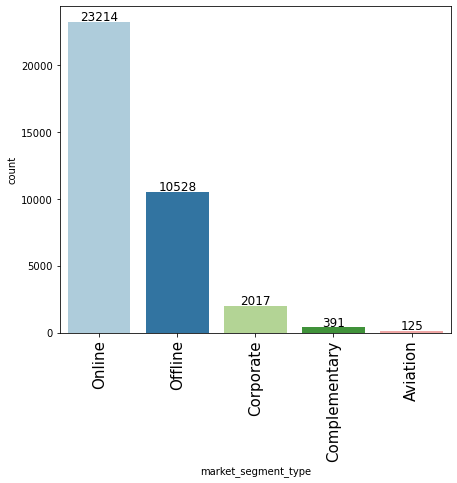

In [18]:
 #Observations on origin of reservations. 
labeled_barplot(data,"market_segment_type")

#### 2) Which market segment do most of the guests come from?

Most guests come from online reservations. 

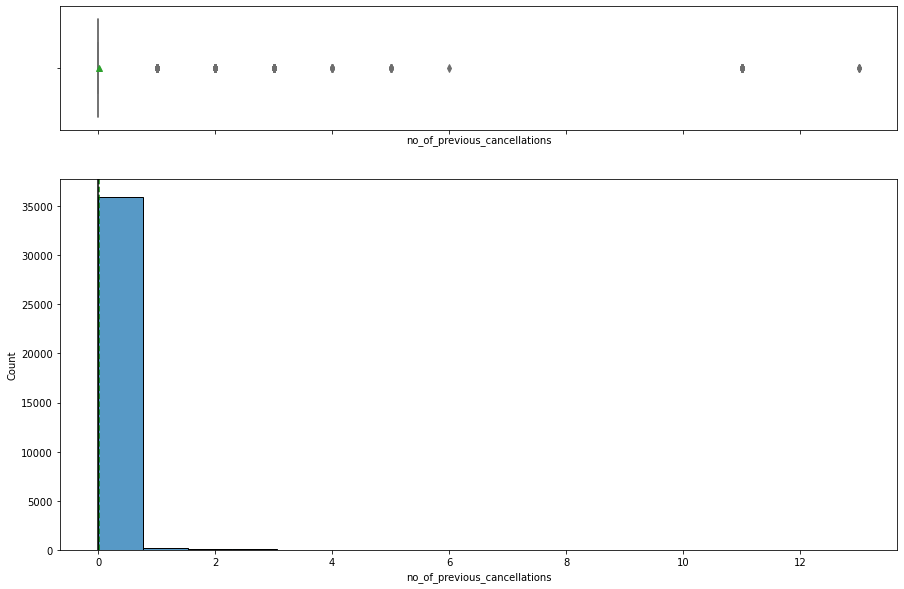

In [19]:
 #Observations on previous booking cancellations.
histogram_boxplot(data, "no_of_previous_cancellations") 

Most reservations are first time guests or have never canceled. A small percentage cancel once and even fewer more than once. 

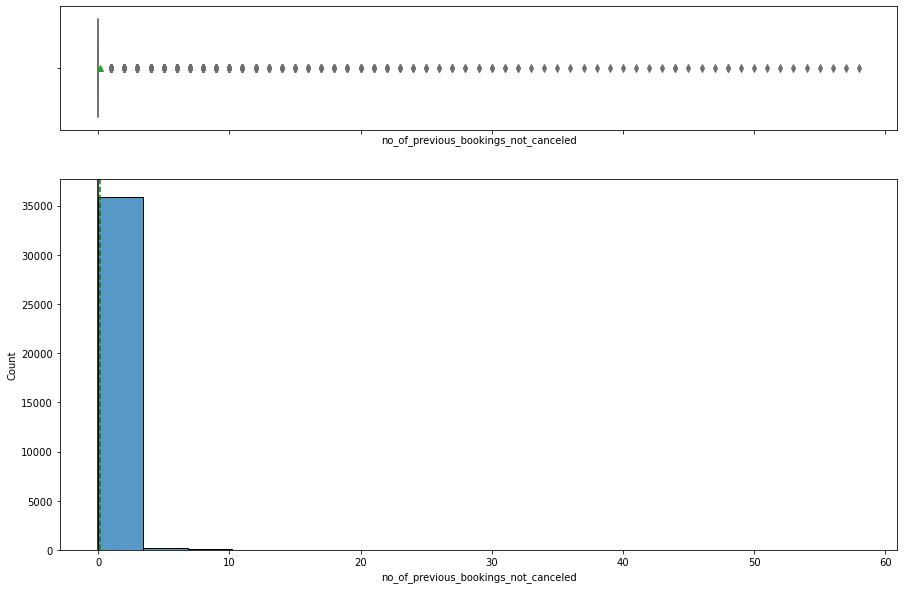

In [20]:
#Observations on previous booking not cancelled 
histogram_boxplot(data, "no_of_previous_bookings_not_canceled") 

We can see that a majority of the bookings are first time customers. Though we do have guests who have booked up to 60 times. These must be corporate, airlines, or travel agents who use INN Hotels as a favorite service. I wonder if the few rows that have more than 3 cancellations from above are the same that have up to 60 reservations made. 


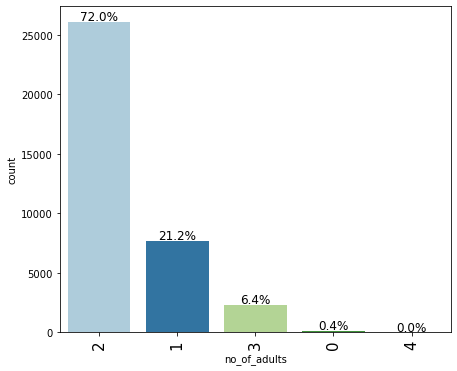

In [21]:
 #Observations on number of Adults. 
labeled_barplot(data, "no_of_adults", perc=True)

72% of reservations are traveling as a couple. 

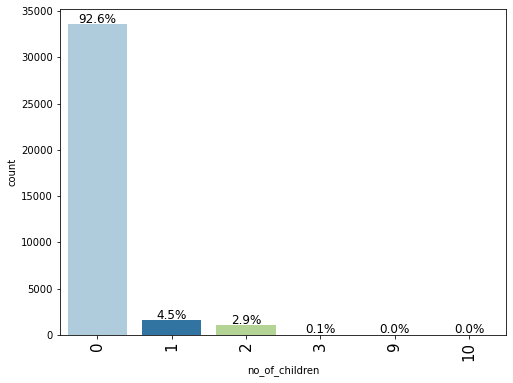

In [22]:
 #Observations on the number of children
labeled_barplot(data, "no_of_children", perc=True)

We can see that most reservations are with out kids. 8% bring their young family members, but most want to experience Portugal with adult company. 

The 9 and 10 child reservation is an interesting outlier, but I think we can convert 3 to "3 or more" and the data will be just as usuable. 

In [23]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

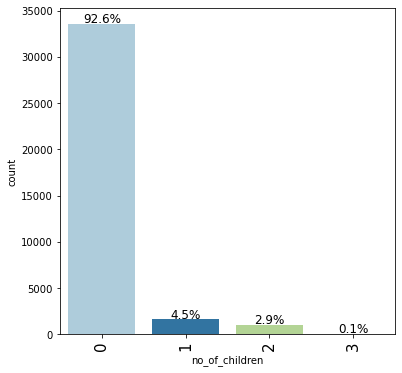

In [24]:
labeled_barplot(data, "no_of_children", perc=True)

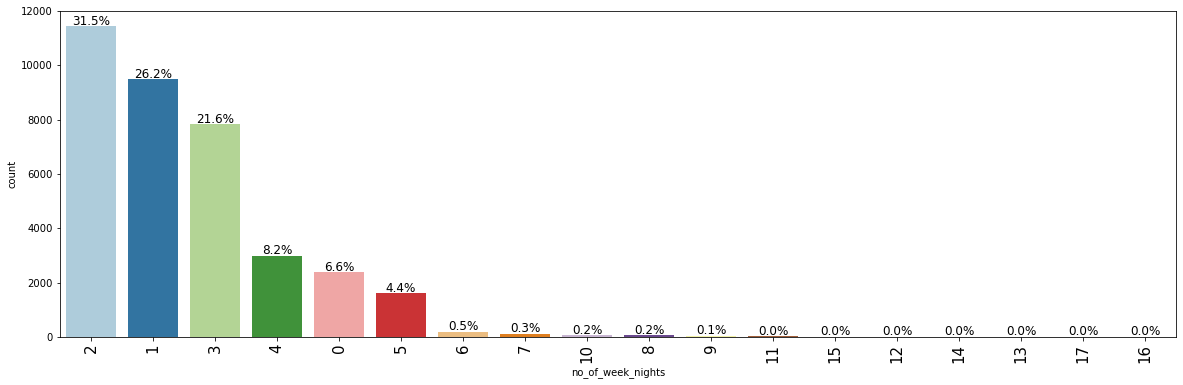

In [25]:
#Observations for weeknight stays.
labeled_barplot(data, "no_of_week_nights", perc=True) # Observations on week night stays

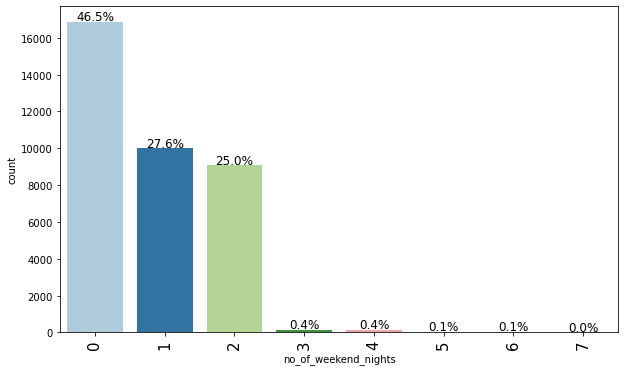

In [26]:
#Observations for weekend stays
labeled_barplot(data, "no_of_weekend_nights", perc=True)

We see that almost half of reservations are made for week nights. A small percentage will stay longer than 5 days and less than 1% of the reservations span more than one weekend. I wonder if the length of the reservation has any bearing on the cancellation. 

In [27]:
#Creates a column that calculates the length of stay
#data['stay_duration'] = data["no_of_week_nights"] + data['no_of_weekend_nights']
data.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [28]:
#Observations for length of stay
#labeled_barplot(data, "stay_duration", perc=True) 

We can see that about half the reservations are for 2-3 nights, but about 6% will stay longer than a week. 

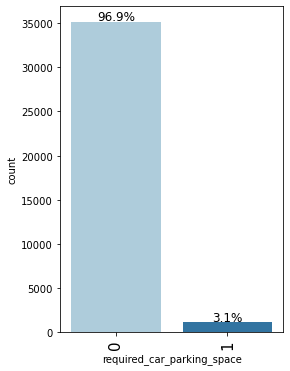

In [29]:
 #Observations for required parking. 
labeled_barplot(data, "required_car_parking_space", perc=True)

The vast majority of reservations do not require a parking space. This column doesn't seem to add much to model since most rows will have a zero value. 

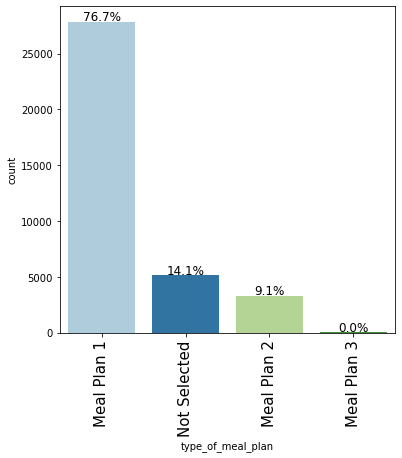

In [30]:
#Observations on meal plans
labeled_barplot(data, "type_of_meal_plan", perc=True)

More than 3/4 of the reservations are for breakfast only, this makes sense since I'm sure a part of the vacation will be to go out and explore, sightsee, and try the local food scene. It is nice to have the options, but not surprising that meal plan 1 is the most popular. 

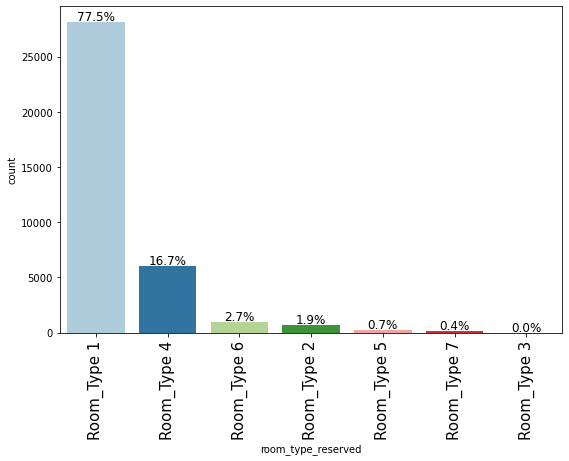

In [31]:
#Observations on room type reserved
labeled_barplot(data, "room_type_reserved", perc=True) 

Room type 1 is the most popular type of reservation by far, I can only assume with as many couples as are traveling to the hotels that this is single King sized room. 

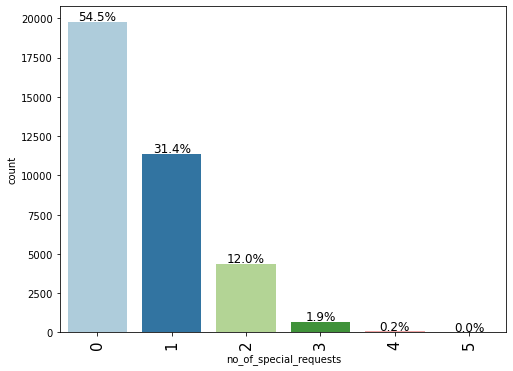

In [32]:
#Observations on special requests
labeled_barplot(data, "no_of_special_requests", perc=True) 

Most reservations don't have any special requests, but almost half do. I can assume if there are more special requests then this may indicate a guest who has been there before and knows to make the requests.

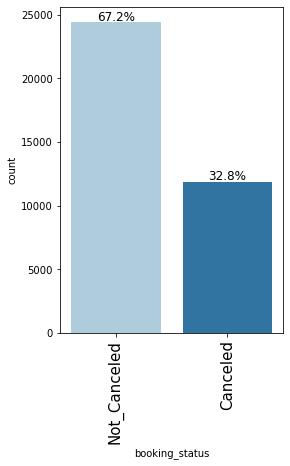

In [33]:
#Observations on booking_status
labeled_barplot(data, "booking_status", perc=True) 

#### 4) What percentage of bookings are canceled?

We can see that 32.8% of the reservations are cancelled. For further analysis I want to redcode this as 0 = Not_Canceled and 1 = Canceled. This will allow easy interpretation for the model. 


In [34]:
#Recode of Booking Status
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis


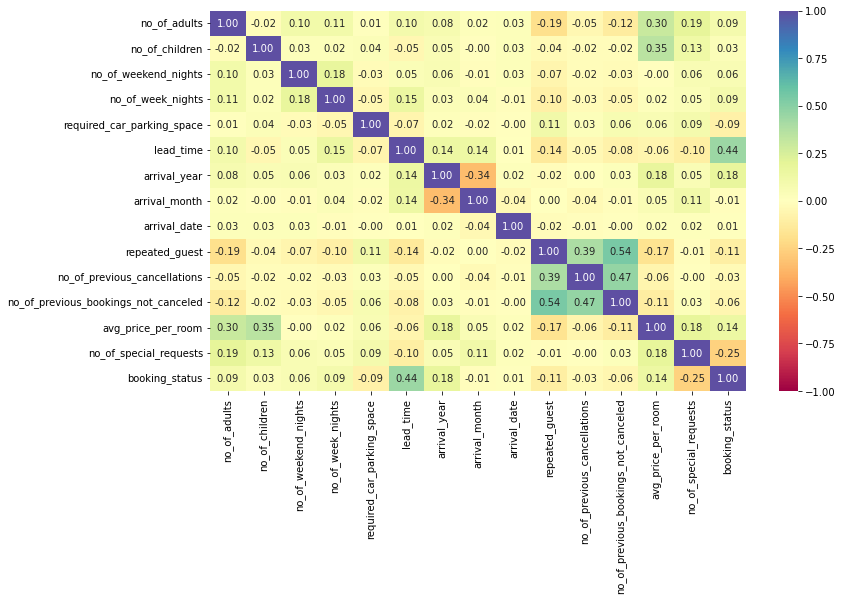

In [35]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

No big reveals on the heat map. We can assume if the they are a repeated guest then they will have a high number of previous booking not cancelled. There is an interesting correlation between previous cancellations and previous bookings not cancelled. I wonder if this is coming from the airlines or corporate reservations.

In [44]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [37]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

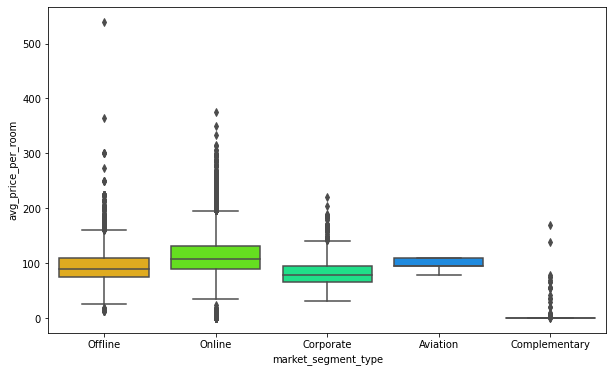

In [38]:
# Average room price across the segements. 
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

#### 3) Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
We can see that online reservations have a higher median price than offline. We can see that corporate reservations are lower as we would expect that there would be a sort of bulk discount or negotiated dicounted rates. Aviation has a narrow negotiated rate for stay, and there is more variability in complementary than anticipated. This may be due to comping a portion of the stay rather than the entire stay. 

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


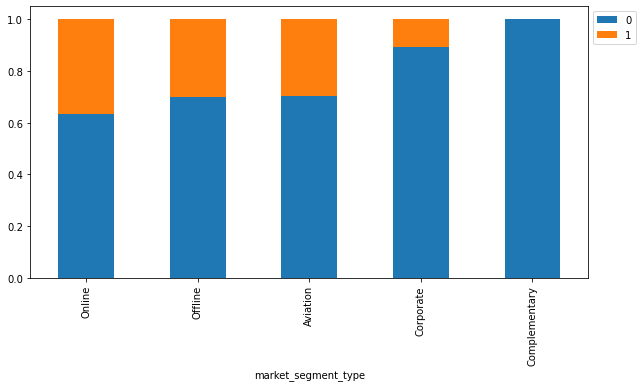

In [39]:
#Observations on cancellations by marget segment
stacked_barplot(data, "market_segment_type", "booking_status")

Cancellations happen more often in online reservations, but a good portion of offline and aviation reservations are also canceled. Corporate has the smallest portion of cancellations, and of course complementary reservations are not canceled. Who is going to pass up a free stay? Not me. 

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


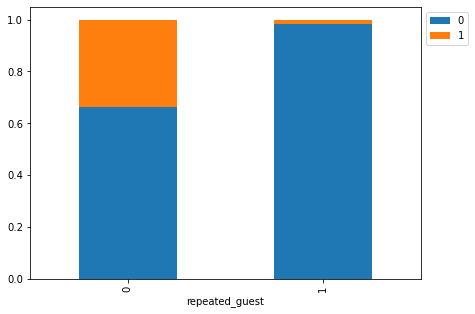

In [40]:
#Observations on cancellations by repeat guests
stacked_barplot(data, "repeated_guest", "booking_status")

#### 5) Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

We can see that less than 2% of repeated guests will cancel their reservation. 

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


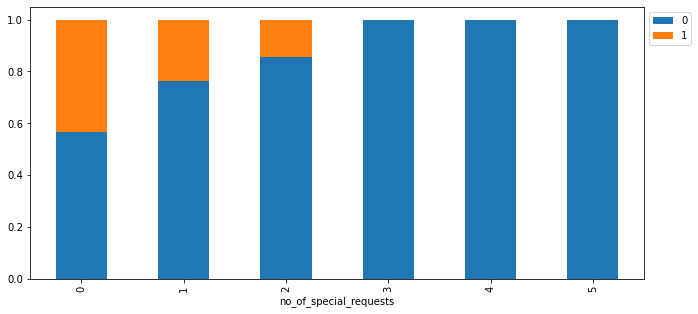

In [41]:
#Observations on cancellations and special requests
stacked_barplot(data, "no_of_special_requests", "booking_status")

#### 6) Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
We can see that if the guest made no special requests they are more likely to cancel. Cancellations occur with 1 or 2 requests but at a lower rate. 

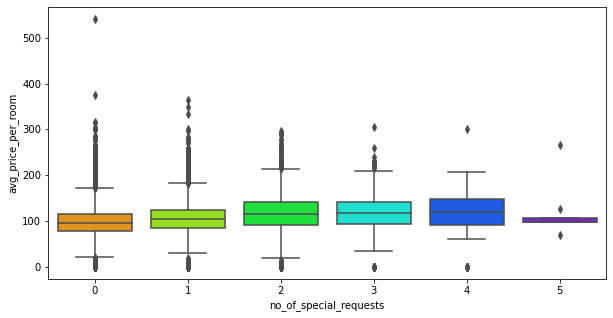

In [42]:
#Observations for special requests and avg room price.

plt.figure(figsize=(10, 5))
sns.boxplot( data=data, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow") 
plt.show()

We can see that special requests will raise the room price, though the third and fourth don't raise it by much. 

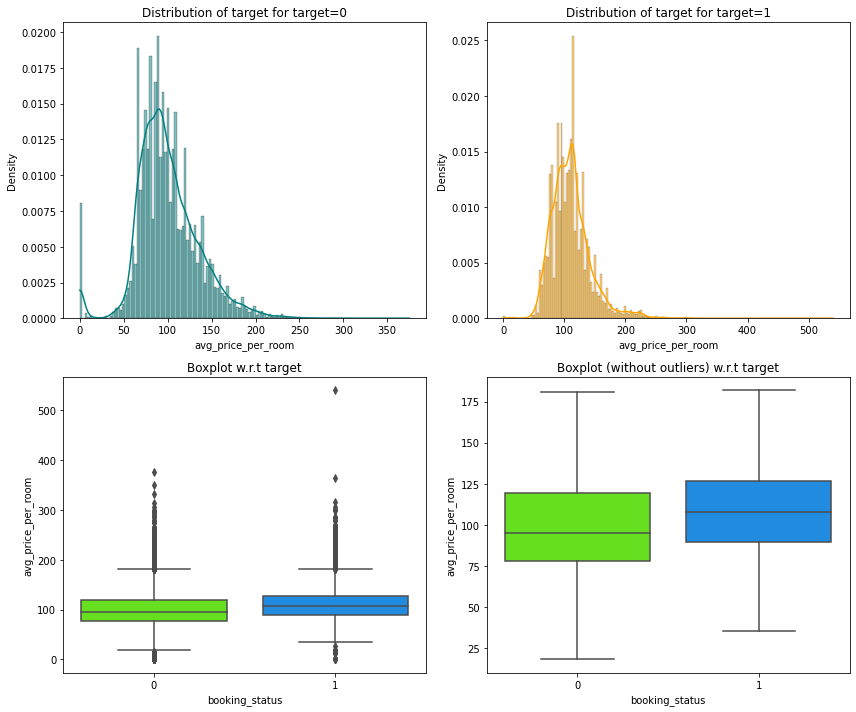

In [45]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

From the graphs we can see that canceled reservations had a higher average price. 

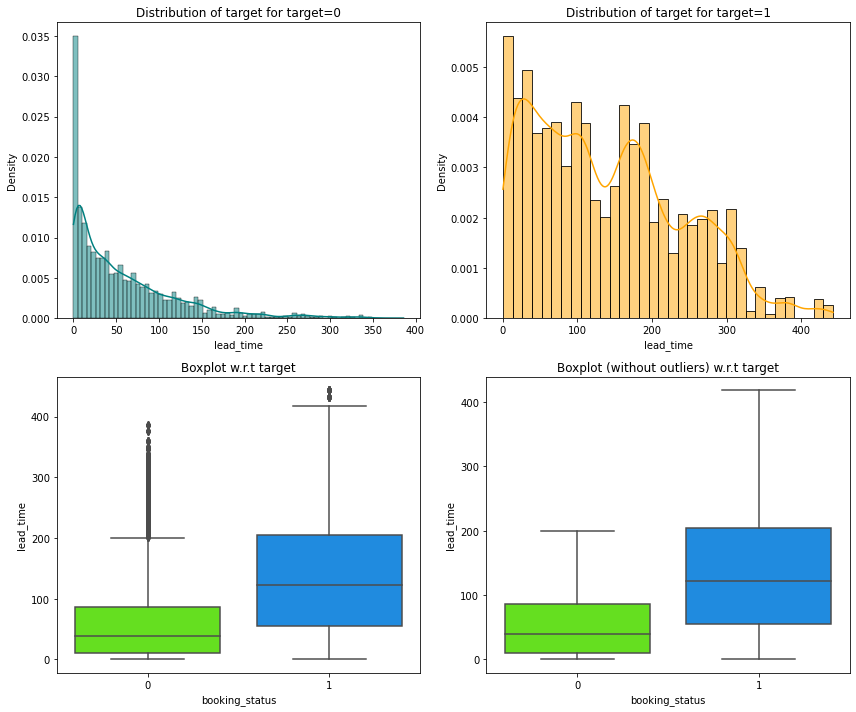

In [46]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

Lower lead times could mean less time to cancel, but overall the longer the leadtime the more likely the reservation is to cancel. 

In [47]:
#Creates a data frame that only holds info of families and couples traveling. 
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [48]:
#Creates a column to so we can filter families from couples. 
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


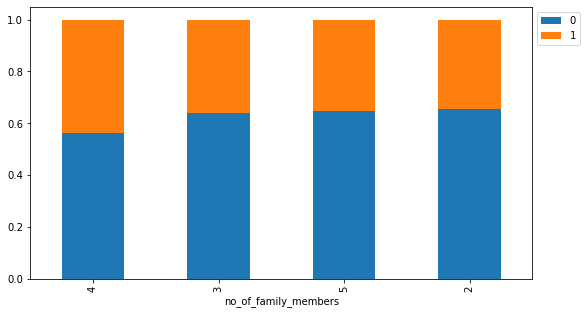

In [49]:
#Observations on cancellations and special requests
stacked_barplot(family_data, "no_of_family_members", "booking_status")

Families of 4 tend to have a higher cancellation rate. Though I would say anyone traveling in a group has a higher rate of cancellation. 

In [50]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [52]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

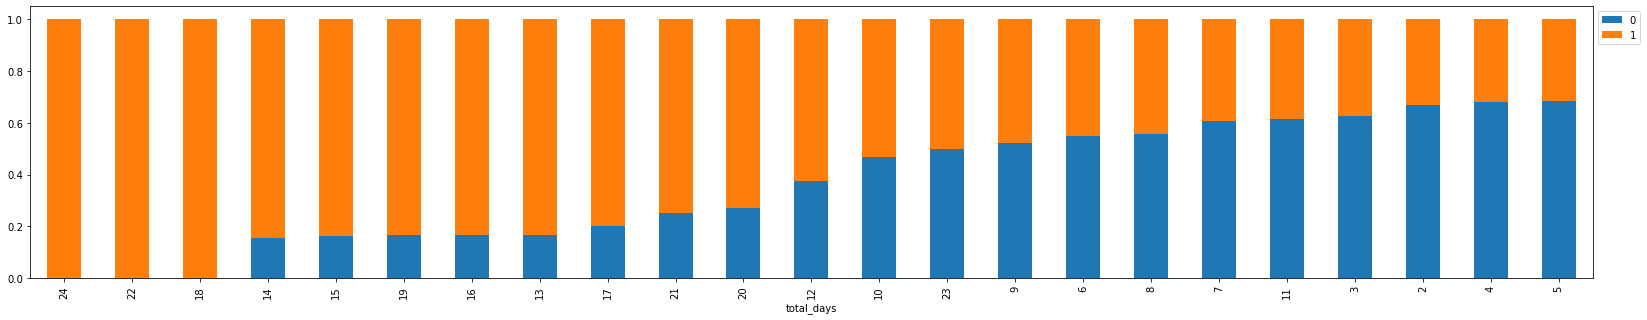

In [53]:
#Observations on cancellations and stay duration
stacked_barplot(stay_data, "total_days", "booking_status")

We can see that long reservations tend to be canceled. Few of them are made, but they are more likely to be canceled. 

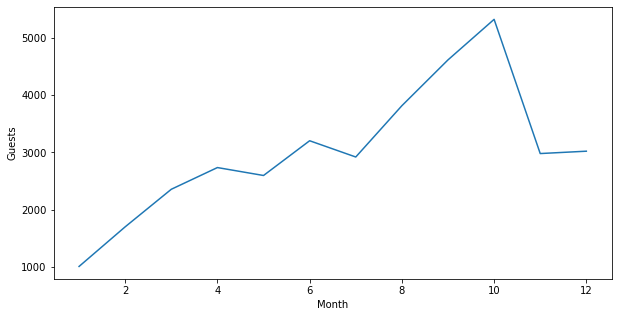

In [54]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


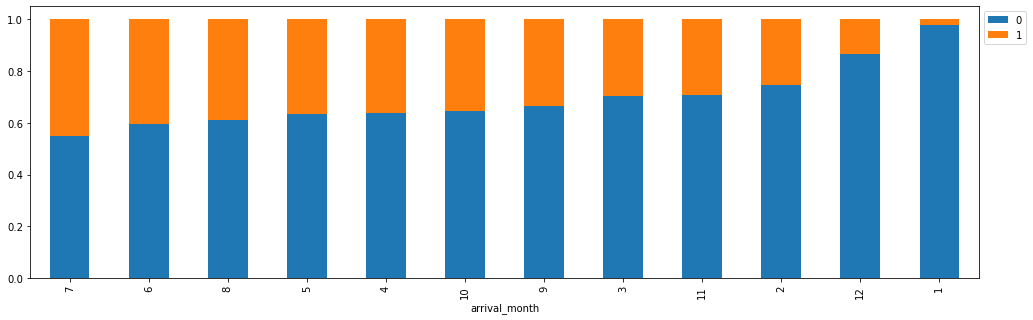

In [55]:
#Observations on cancellations and stay duration
stacked_barplot(data, "arrival_month", "booking_status")

We know that the busiest months are Sept and Oct. Those months have and 30-40% cancellation rate, but the highest cancellation rate falls in July. Seems Apr to Oct is when we can see the highest incidences of cancellation. 

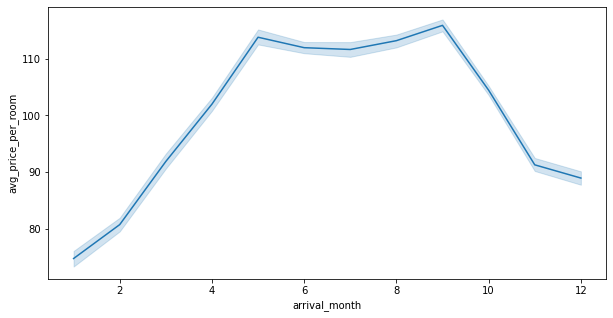

In [56]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="arrival_month", y="avg_price_per_room") ## Complete the code to create lineplot between average price per room and arrival month
plt.show()

We see that the average price per month increases in May and stays higher through October. We can also see that these are the months that have the highest rates of cancellations. This may be due to finding a better deal elsewhere. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

The data set has not missing values or duplicates, so we can move onto outlier detection.

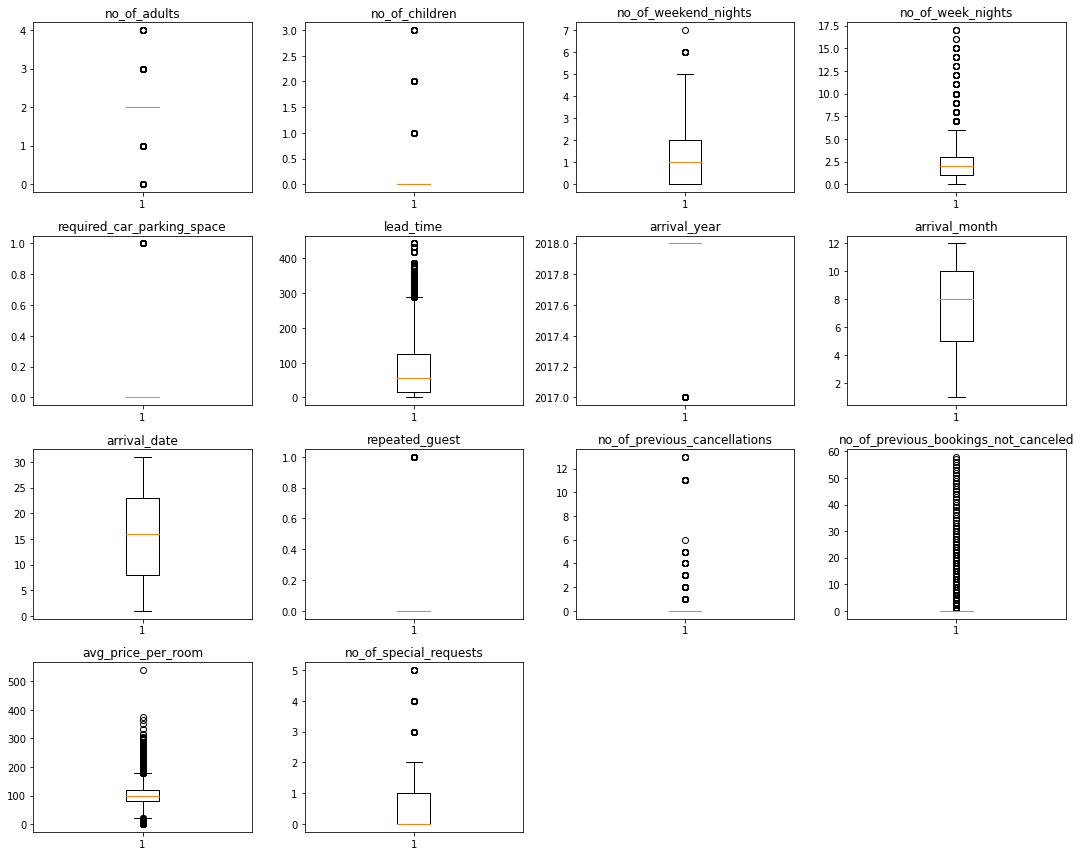

In [57]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Lots of outliers in the dataset, but I think they are proper values and should remain included. 

Time to create the test and train data sets. As well as get dummy variables for categorical columns. 

In [58]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [59]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

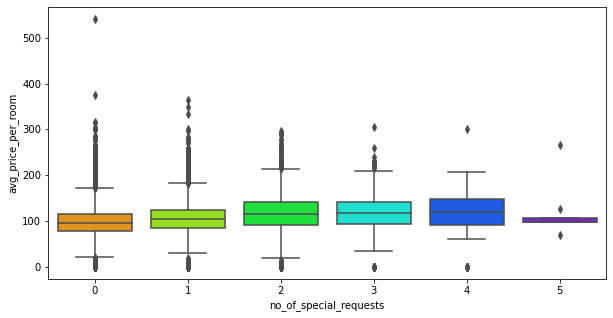

In [60]:
#Observations for special requests and avg room price.

plt.figure(figsize=(10, 5))
sns.boxplot( data=data, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow") 
plt.show()

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


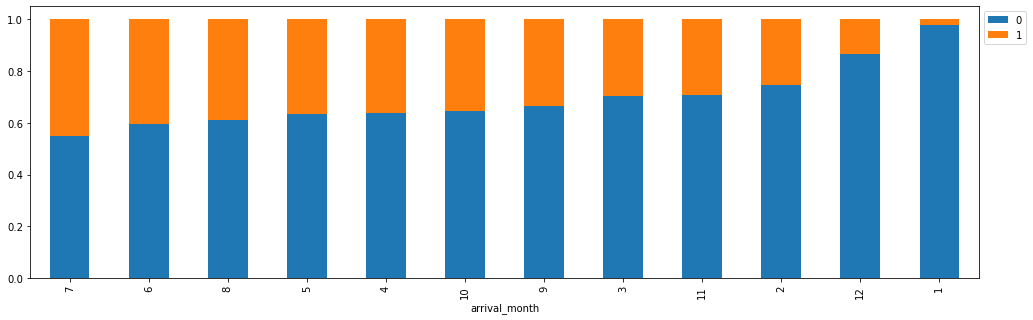

In [61]:
#Observations on cancellations and stay duration
stacked_barplot(data, "arrival_month", "booking_status")

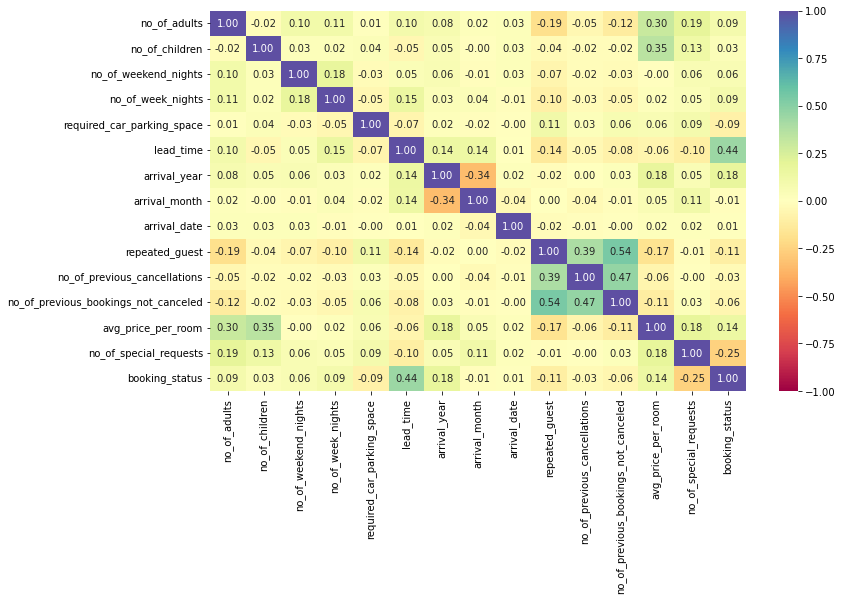

In [62]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Since we are keeping the outliers the graphs haven't changed much, so we will move onto create the logistic model. 

## Building a Logistic Regression model

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [64]:
 #defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [65]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 29 Jul 2022   Pseudo R-squ.:                  0.3274
Time:                        00:48:21   Log-Likelihood:                -10823.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                             0.1014      0.038      2.694      0.007       0.028       0.175
no_of_children                           0.1692      

We want to limit the number of false positives and false negatives. False positives mean that we may not have the resources as requested by the client and can do damage to the brand. False negaitves mean that we will lose revenue as we have allocated resources to a cancellation. We check the confusion matrix to see where this model stands, and then proceed to use the F1 score to tweak the model to limit all wrong predictions. 

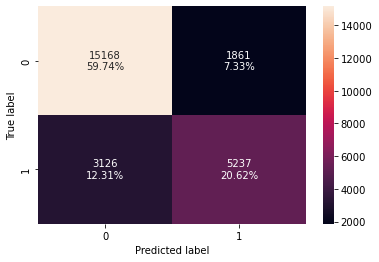

In [66]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [67]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80360,0.62621,0.73781,0.67745


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [68]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [69]:
checking_vif(X_train)

,feature,VIF
0,no_of_adults,18.36440
1,no_of_children,2.23882
2,no_of_weekend_nights,2.00373
3,no_of_week_nights,3.77641
4,required_car_parking_space,1.07370
5,lead_time,2.47416
6,arrival_year,329.44484
7,arrival_month,7.20648
8,arrival_date,4.21987
9,repeated_guest,1.82787


In [70]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                            18.36440
no_of_children                           2.23882
no_of_weekend_nights                     2.00373
no_of_week_nights                        3.77641
required_car_parking_space               1.07370
lead_time                                2.47416
arrival_year                           329.44484
arrival_month                            7.20648
arrival_date                             4.21987
repeated_guest                           1.82787
no_of_previous_cancellations             1.40040
no_of_previous_bookings_not_canceled     1.65987
avg_price_per_room                      18.64626
no_of_special_requests                   2.01810
type_of_meal_plan_Meal Plan 2            1.32576
type_of_meal_plan_Meal Plan 3            1.02546
type_of_meal_plan_Not Selected           1.43837
room_type_reserved_Room_Type 2           1.12693
room_type_reserved_Room_Type 3           1.00347
room_type_reserved_Room_Type 4    

We see that there are quite a few columns that have VIFs over 10, and so we are going to treat them one at a time and see how the model adjusts. Starting with the largest value "arrival year".

In [72]:
X_train1 = X_train.drop("arrival_year", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series after arrival year feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

no_of_adults                           18.29486
no_of_children                          2.23859
no_of_weekend_nights                    1.99488
no_of_week_nights                       3.73487
required_car_parking_space              1.07361
lead_time                               2.47364
arrival_month                           7.10332
arrival_date                            4.17658
repeated_guest                          1.81944
no_of_previous_cancellations            1.40037
no_of_previous_bookings_not_canceled    1.65968
avg_price_per_room                     18.04761
no_of_special_requests                  2.01358
type_of_meal_plan_Meal Plan 2           1.32422
type_of_meal_plan_Meal Plan 3           1.02545
type_of_meal_plan_Not Selected          1.43502
room_type_reserved_Room_Type 2          1.12607
room_type_reserved_Room_Type 3          1.00347
room_type_reserved_Room_Type 4          1.63182
room_type_reserved_Room_Type 5          1.03445
room_

There are fewer values above 10 and lower VIFs, but we aren't all under 10. Next to go is the online market segment. 

In [73]:
X_train2 = X_train1.drop("market_segment_type_Online", axis=1)

vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series after online feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

no_of_adults                           14.13150
no_of_children                          2.23616
no_of_weekend_nights                    1.96924
no_of_week_nights                       3.56322
required_car_parking_space              1.07356
lead_time                               2.45641
arrival_month                           6.52878
arrival_date                            3.90312
repeated_guest                          1.81441
no_of_previous_cancellations            1.39931
no_of_previous_bookings_not_canceled    1.65968
avg_price_per_room                     13.43639
no_of_special_requests                  2.00931
type_of_meal_plan_Meal Plan 2           1.30877
type_of_meal_plan_Meal Plan 3           1.02540
type_of_meal_plan_Not Selected          1.36978
room_type_reserved_Room_Type 2          1.11264
room_type_reserved_Room_Type 3          1.00346
room_type_reserved_Room_Type 4          1.57709
room_type_reserved_Room_Type 5          1.03119
room_

This round reduced the VIF for the market segments, and now we can attack the last few. Starting with number of adults. 

In [75]:
X_train3 = X_train2.drop("no_of_adults", axis=1)

vif_series4 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series after number of adults selection: \n\n{}\n".format(vif_series4))

Series after number of adults selection: 

no_of_children                         2.19389
no_of_weekend_nights                   1.92755
no_of_week_nights                      3.46968
required_car_parking_space             1.07308
lead_time                              2.38715
arrival_month                          6.39372
arrival_date                           3.78889
repeated_guest                         1.81426
no_of_previous_cancellations           1.39725
no_of_previous_bookings_not_canceled   1.65856
avg_price_per_room                     9.10630
no_of_special_requests                 1.96853
type_of_meal_plan_Meal Plan 2          1.30221
type_of_meal_plan_Meal Plan 3          1.02532
type_of_meal_plan_Not Selected         1.32163
room_type_reserved_Room_Type 2         1.11242
room_type_reserved_Room_Type 3         1.00340
room_type_reserved_Room_Type 4         1.54175
room_type_reserved_Room_Type 5         1.03033
room_type_reserved_Room_Type 6         2.03248
room_type_reserve

Now all VIFs are under 10, but we do still have some moderate multicollinearity. I happen to think they are important factors for cancellation, so I am going to include them in the new model. 

In [99]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train3.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Fri, 29 Jul 2022   Pseudo R-squ.:                  0.3011
Time:                        15:43:15   Log-Likelihood:                -11246.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                           0.2280      0.060      3.789      0.000       0.110       0.346
no_of_weekend_nights                    -0.0003      

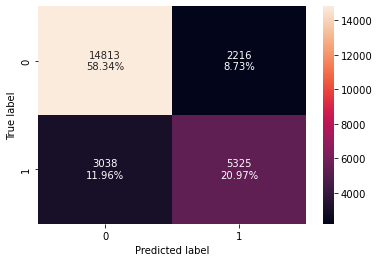

In [100]:
confusion_matrix_statsmodels(lg1, X_train3, y_train)

In [101]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train3, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79308,0.63673,0.70614,0.66964


The accuracy of the model and the F1 scores have dropped a bit, but we haven't yet dropped high P value columns.

In [92]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train3[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_children', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'room_type_reserved_Room_Type 2', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [93]:
X_train4 = X_train3[selected_features]

In [95]:
logit2 = sm.Logit(y_train, X_train4.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25378
Method:                           MLE   Df Model:                           13
Date:                Fri, 29 Jul 2022   Pseudo R-squ.:                  0.2981
Time:                        15:40:41   Log-Likelihood:                -11295.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_children                     0.1869      0.044      4.262      0.000       0.101       0.273
no_of_week_nights                 -0.0615      0.011     -5.469      0.

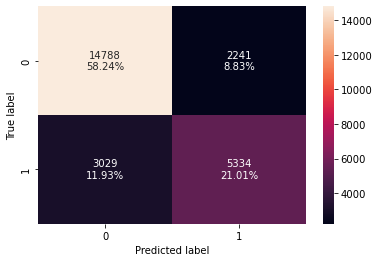

In [102]:
confusion_matrix_statsmodels(lg2, X_train4, y_train)

In [103]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train4, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79245,0.63781,0.70416,0.66934


We now have a final model. The accuracy is almost 80%, the F1 is at .67, and we have the simplest model let's interpret the odds. 

The coefficients (βs) of the logistic regression model are in terms of log(odds) and to find the odds, we have to take the exponential of the coefficients

Therefore, odds=exp(β)

The percentage change in odds is given as (exp(β)−1)∗100

In [105]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train4.columns)

,Odds,Change_odd%
no_of_children,1.20554,20.55353
no_of_week_nights,0.94036,-5.96397
required_car_parking_space,0.20642,-79.35761
lead_time,1.01539,1.53885
arrival_month,0.89227,-10.77297
arrival_date,0.98170,-1.83011
repeated_guest,0.04131,-95.86867
no_of_previous_cancellations,1.21292,21.29203
avg_price_per_room,1.00618,0.61839
no_of_special_requests,0.23014,-76.98632


* If we add kids to the reservation we see that there is ~20% increase in the chance of cancellation
* If we add a weeknight stay then we see the chances of a cancellation decrease by ~6%.
* If we see they require a parking space then the chances of cancellation decresase by ~79%
* Adding lead time we see there is a ~1.5% chance increase for a cancellation
* The later on in the year the reservation we reduce the chance for cancellation by ~11%
* The arrival date reduces by ~2%
* Being a repeated guest reduces a chance of cancellation by almots ~96%
* Average price per room has less ~1% increase in cancellation
* The number of special request can reduce cancellations by almost ~77%
* Type 2 meal plans increase cancellation by ~37%.
* Type 2 room reduces cancellation by ~52%
* As predicted before corporate and offline reservations reduce cancellation by up to 89%

## Model performance evaluation

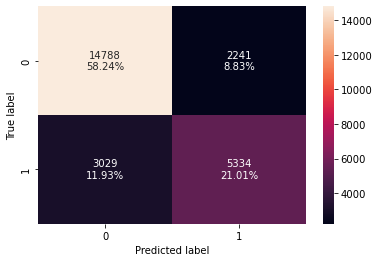

In [106]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train4, y_train)

In [107]:
## Check performance on X_train4 and y_train
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg2, X_train4, y_train) 
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79245,0.63781,0.70416,0.66934


#### Test set performance

In [129]:
X_test4 = X_test[list(X_train4.columns)]

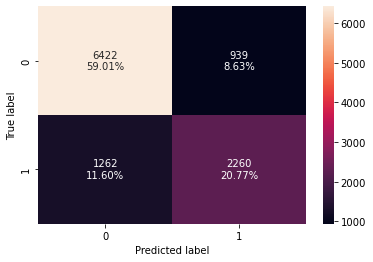

In [130]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test4, y_test)

In [131]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test4, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79776,0.64168,0.70647,0.67252


The accuracy and F1 are nearly identical for the training and test set meaning the model is not overfitting. 

### Improving the model. 

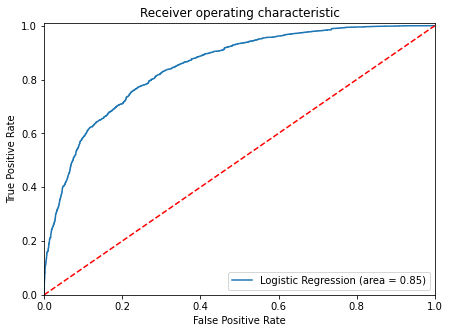

In [132]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train4))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Model is working well on the training set. 

In [133]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.34473981617067756


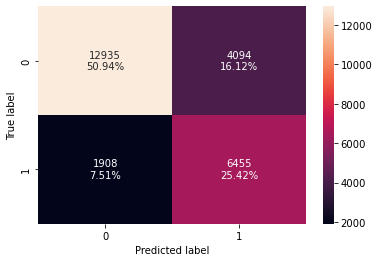

In [134]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train4, y_train, threshold=optimal_threshold_auc_roc
)

In [135]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train4, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.76363,0.77185,0.61191,0.68264


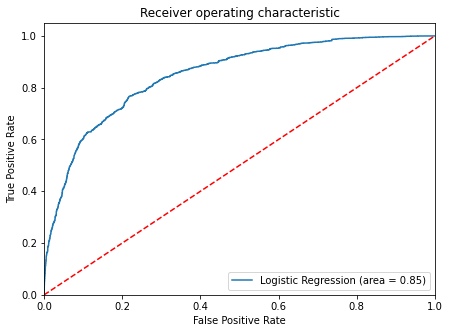

In [136]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

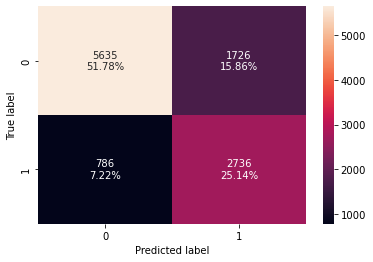

In [139]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test4, y_test, threshold=optimal_threshold_auc_roc)

In [140]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test4, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.76918,0.77683,0.61318,0.68537


We still have good accuracy at ~78% and a higher F1 score for the test set. 

#### Precision Recall curve

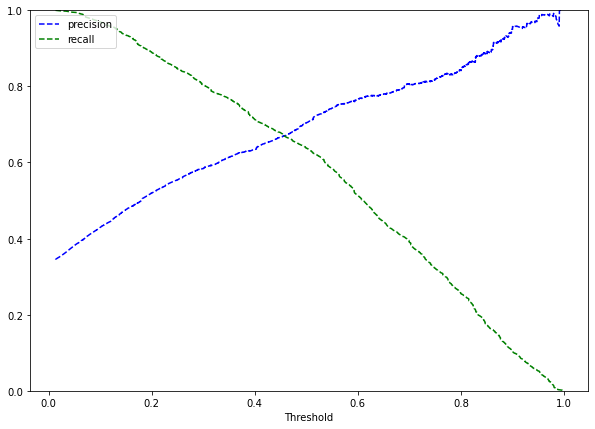

In [114]:
y_scores = lg2.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [141]:
# setting the threshold
optimal_threshold_curve = 0.44

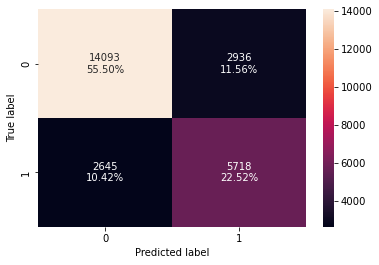

In [142]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train4, y_train, threshold=optimal_threshold_curve)

In [143]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train4, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78021,0.68373,0.66073,0.67203


We see imporved accuracy with the threshold set at .44 instead of the standatrd .5

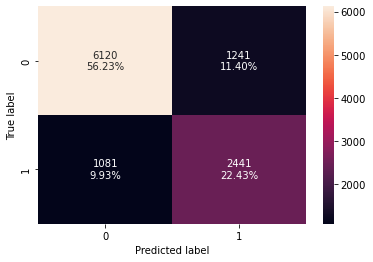

In [144]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test4, y_test, threshold=optimal_threshold_curve)

In [145]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test4, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.78664,0.69307,0.66295,0.67768


## Final Model Summary

### Selecting the Final Model

In [146]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.34 Threshold",
    "Logistic Regression-0.44 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.34 Threshold,Logistic Regression-0.44 Threshold
Accuracy,0.79245,0.76363,0.78021
Recall,0.63781,0.77185,0.68373
Precision,0.70416,0.61191,0.66073
F1,0.66934,0.68264,0.67203


In [147]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.34 Threshold",
    "Logistic Regression-0.44 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.34 Threshold,Logistic Regression-0.44 Threshold
Accuracy,0.79776,0.76918,0.78664
Recall,0.64168,0.77683,0.69307
Precision,0.70647,0.61318,0.66295
F1,0.67252,0.68537,0.67768


We can see that all models perform a little better with the test data. In choosing the model to use we will go with the mid F1 score but highest accuracy, which uses the .44 threshold. 

## Building a Decision Tree model

#### Data Prep for modeling


In [148]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [149]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))


Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


We can see the ~33% cancellation rate is preserved in the training and test data set. 

In [150]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [151]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Build the Decision Tree

In [154]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

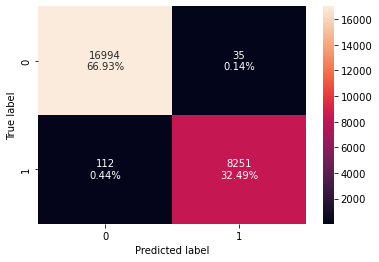

In [155]:
confusion_matrix_sklearn(model, X_train, y_train)

In [156]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


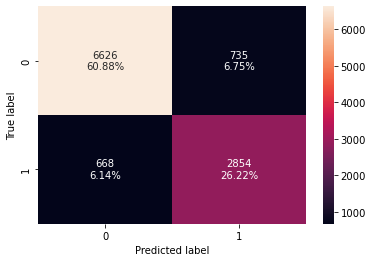

In [157]:
confusion_matrix_sklearn(model, X_test, y_test)

In [158]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.87108,0.81034,0.79521,0.80270


We can see that the model drops in perfomance with the test data telling us that it is overfitting. We should do some pruning to help improve the perfomance on the test data. 

## Do we need to prune the tree?

Before we prune let check the important features. 

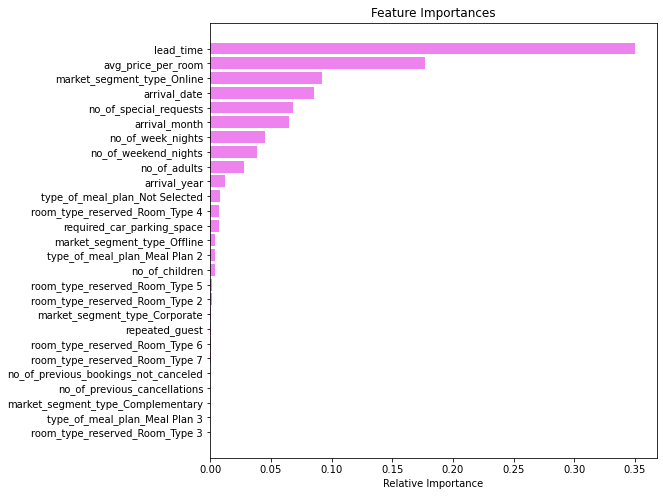

In [159]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Let's try pre-pruning to simplify the tree. 

In [160]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

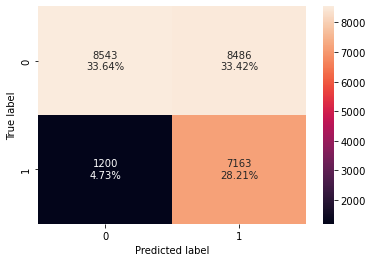

In [161]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [162]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.61854,0.85651,0.45773,0.59662


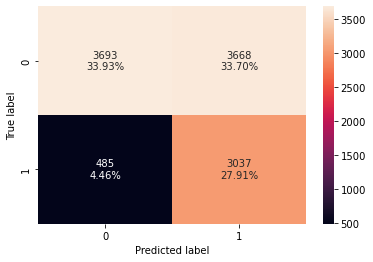

In [163]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [164]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.61840,0.86229,0.45295,0.59392


We can see that limiting hyperparameters has a severe effect on the accuracy of the model. It is far less than the 87%, and even though we have higher recall I would not call this an effective model. 

#### Visualizing the tree

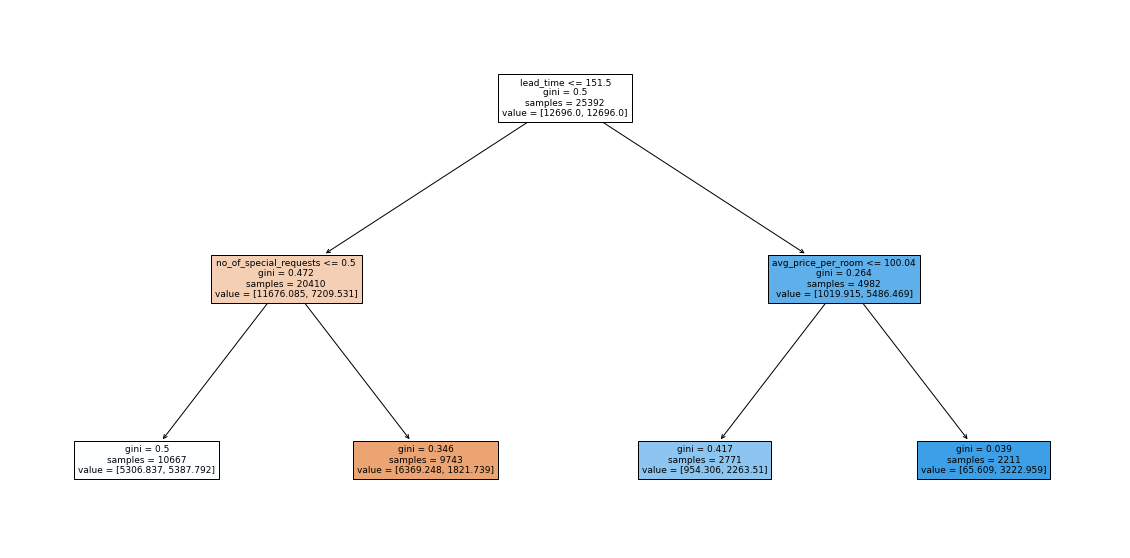

In [165]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [166]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



According to the model if the lead time is less than or equal to 152 days and there is less than 1 special request the reservation will likely be cancelled. 

### Post Pruning the model

In [167]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [168]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1899,0.00890,0.32806
1900,0.00980,0.33786
1901,0.01272,0.35058
1902,0.03412,0.41882


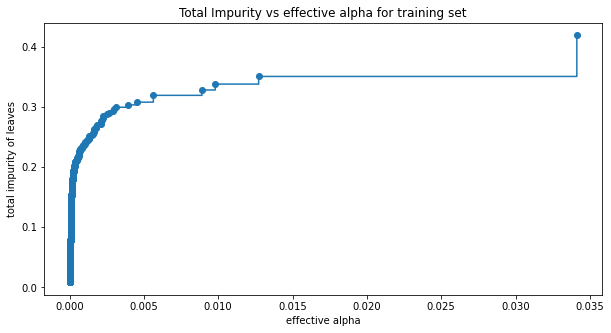

In [169]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [170]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


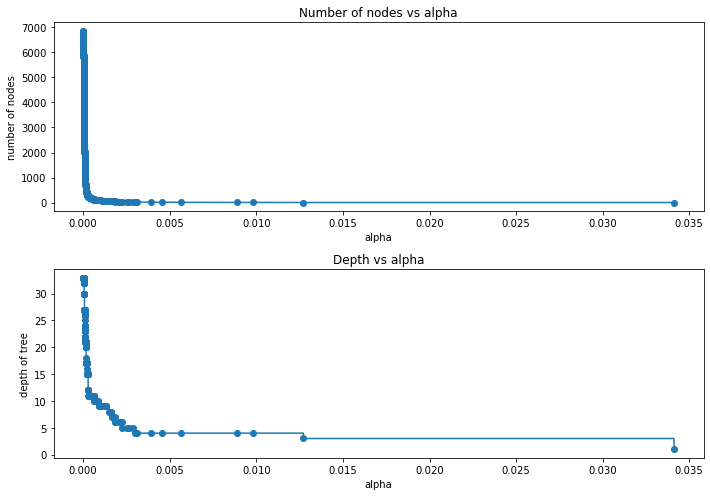

In [171]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [176]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

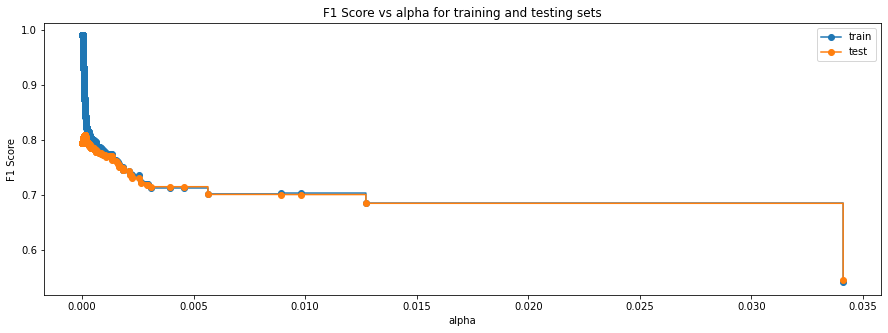

In [177]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [178]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


## Model Performance Comparison and Conclusions

#### Checking performance on the training set

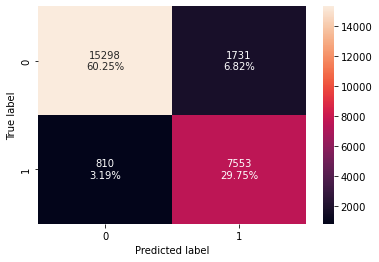

In [179]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [180]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89993,0.90314,0.81355,0.85601


#### Checking perfomance on the test set

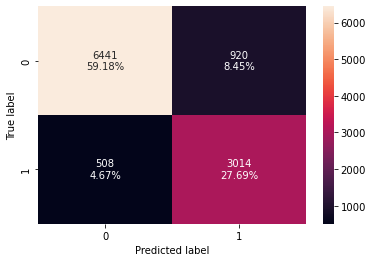

In [181]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [182]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


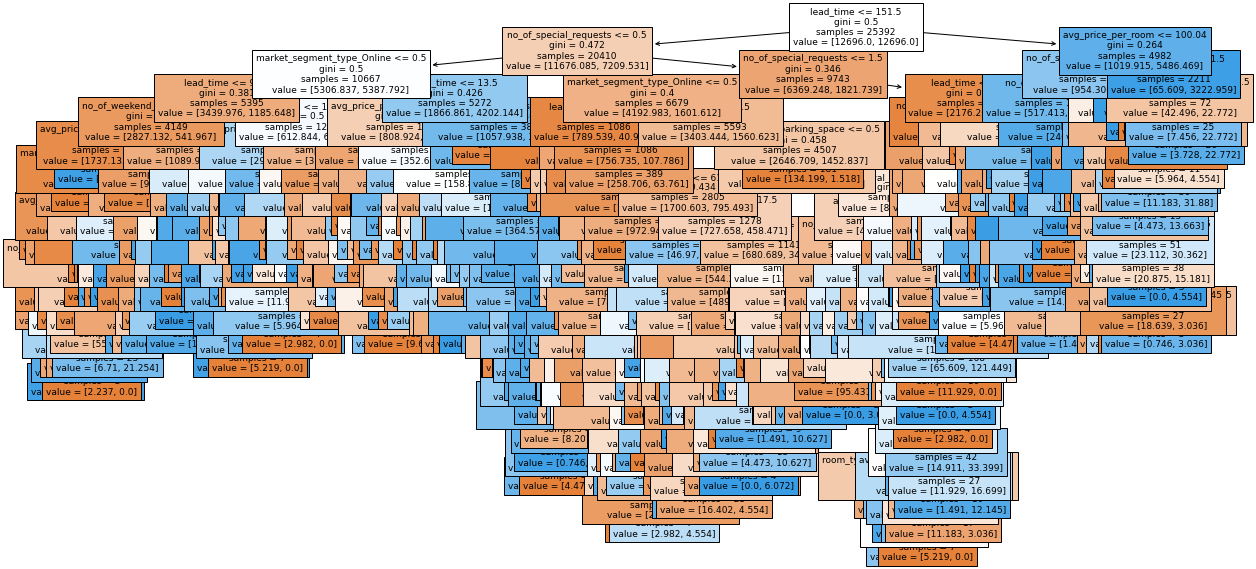

In [183]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [184]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

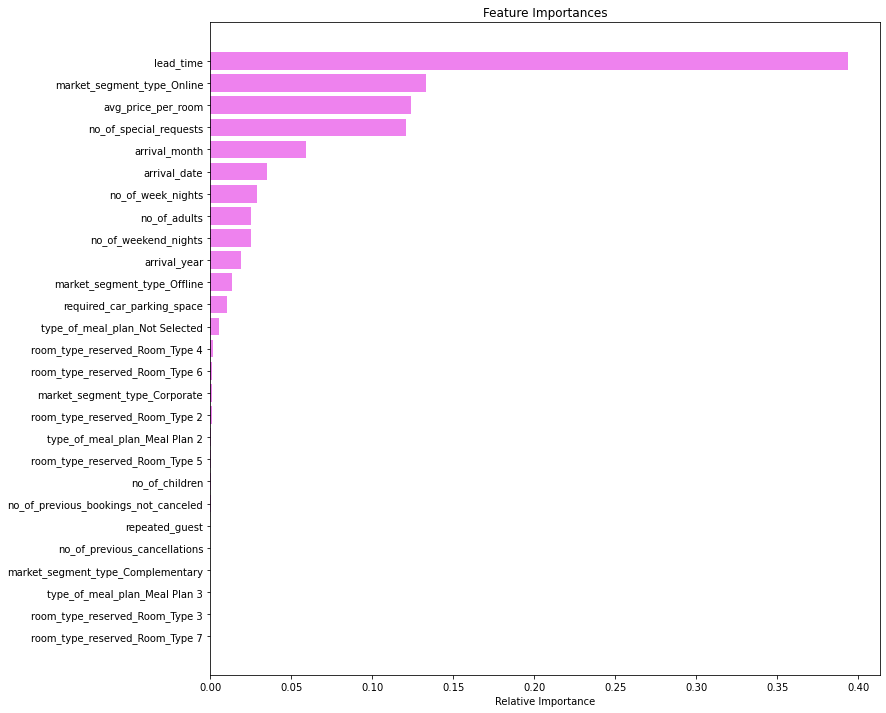

In [185]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [187]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.61854,0.89993
Recall,0.98661,0.85651,0.90314
Precision,0.99578,0.45773,0.81355
F1,0.99117,0.59662,0.85601


In [189]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87108,0.61840,0.86879
Recall,0.81034,0.86229,0.85576
Precision,0.79521,0.45295,0.76614
F1,0.80270,0.59392,0.80848


The original tree was a great model, no pruning that we could do imporved the performance on unseen data. We can see that he post pruning did have a positive effect on recall and F1. That model had the highest accuracy and F1 score, and since we didn't lose much in terms of accuracy we will go with the Post pruning model as the best.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

* When it comes to identifying factors that lead to cancellation, we know that lead time is the biggest factor. 
* I would want to study the lead time of the cancellation. ie how many days before the reservation was it cancelled. Looking at this may give a better understanding as to impacts on rebooking the room. 
* We also see that being a repeat guest have the fewest cancellations overall, so allowing them to cancel with no fees would be little loss to keep their loyalty.
* First time and online reservations during the summer had the highest incidence of cancellation so making a first time resrvation in the summer should come with a fee probably on sliding scale for lead time to offest the cost of rebooking the room.  